<h2> Five Thiry Eight - Can You Win This Hot New Game Show </h2>
By: Brian Scannell <br>
This is a solution to the puzzle posted on http://fivethirtyeight.com/features/can-you-win-this-hot-new-game-show/.
<blockquote>
Two players go on a hot new game show called “Higher Number Wins.” The two go into separate booths, and each presses a button, and a random number between zero and one appears on a screen. (At this point, neither knows the other’s number, but they do know the numbers are chosen from a standard uniform distribution.) They can choose to keep that first number, or to press the button again to discard the first number and get a second random number, which they must keep. Then, they come out of their booths and see the final number for each player on the wall. The lavish grand prize — a case full of gold bullion — is awarded to the player who kept the higher number. Which number is the optimal cutoff for players to discard their first number and choose another? Put another way, within which range should they choose to keep the first number, and within which range should they reject it and try their luck with a second number?
</blockquote>

Assuming both players are playing rationally, the solution to this problem is a game-theoretic solution where both players are at the Nash equilibrium. This means that both players will be using the same threshold, and each winning with 50% chance. If either player deviates from this optimal threshold, they will reduce their win probability.

Assuming a player rejects their first number iff it is below threshold $t$, the probability density of the final number will be:
$$ p_{final}(x;t) =
\begin{cases}
t & 0< x\leq t ,\\
1+t & t< x< 1,
\end{cases}
$$

This is shown in the image below

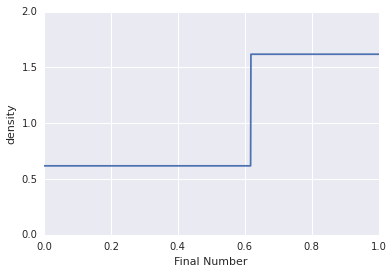

In [1]:
import numpy as np
from numpy import sqrt
import sobol
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

opt_threshold = (np.sqrt(5)-1)/2

def p(x, t): return (x>t) + t
    
X = np.linspace(0,1,1000)
plt.figure(figsize=(6,4))
plt.plot(X,[p(x,opt_threshold) for x in X])

plt.ylim(0,2)
plt.xlabel('Final Number')
plt.ylabel('density');

Imagine the case where the Player Y draws a number exactly at the optimal threshold $t$ while playing against player X. This is the point at which they should be indifferent to drawing a new number. $Y_{New}$ which will be distributed as uniform random. This is the point where $P(X > Y_{New}) = P(X > t)$
Knowing the opponent is playing by the same strategy, we can compute what the probability of winning.
$P(X > t)$ can be computed geometrically from the graph above and is:
$$P(X > t) = 1-t^2$$

The probability of a new uniform number losing to player X, $P(X > Y_{New})$ is computed as follows:

$$
\begin{align*}
P(X_{Final}>Y_{New}) 
  &=  \int_{x=0}^1\int_{y=0}^x P_X(x)P_Y(y)\mathrm{d}x\mathrm{d}y \\
  &=  \int_{x=0}^t\int_{y=0}^x t \mathrm{d}x\mathrm{d}y + \int_{x=t}^1\int_{y=0}^x (t+1)\mathrm{d}x\mathrm{d}y \\
  &=  \frac{1}{2}tx^2\bigg\vert_{x=0}^{x=t}  + \frac{1}{2}(t+1)x^2\bigg\vert_{x=t}^{x=1}  \\  
  &=  \frac{1}{2}(t+1) - \frac{1}{2}t^2  \\  
\end{align*}
$$

Thus, we know that:
$$ P(X_{Final} > Y_{New}) = P(X_{Final} > t) $$
$$ \frac{1}{2}(t+1) - \frac{1}{2}t^2 = (1-t^2) $$
$$ t = \frac{\sqrt{5}-1}{2} \approx 0.618034$$

<h2> Simulation Validation </h2>
We can use simulation to validate that the answer is correct. If the opponent is using the strategy of the optimal threshold, then the best the first player can do is win with 50% probability which will be achieved by also using the optimal threshold. This can be seen in the graph below.

In [2]:
threshes = np.linspace(0.5,0.7)
N = int(1e6) # Trials per threshold

# Quasi-monte carlo will converge faster for large sample sizes and small dimensions
X1,X2,Y1,Y2 = sobol.sobol_seq.i4_sobol_generate(4,N,100)
#X1,X2,Y1,Y2 = np.random.rand(4,N)

win_prob = []
for p in threshes:

    p1 = X1
    new_ones = p1 < p
    p1[new_ones] = X2[new_ones]

    p2 = Y1
    new_ones = p2 < opt_threshold # Opponent uses the optimal threshold
    p2[new_ones] = Y2[new_ones]

    win_prob.append(np.mean(p1>p2))

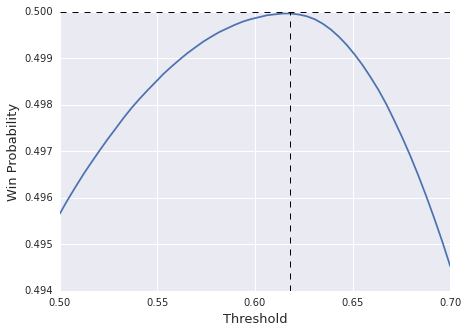

In [3]:

plt.figure(figsize=(7,5))
plt.plot(threshes, win_prob,'-')

plt.axvline(opt_threshold, color='k', linewidth=1, linestyle='dashed')
plt.axhline(0.5, color='k', linewidth=1, linestyle='dashed')

plt.xlabel('Threshold', fontsize=13)
plt.ylabel('Win Probability', fontsize=13);

The above graph shows that the first player has no incentive to deviate from the optimal threshold of $\frac{\sqrt{5}-1}{2}$, and will win 50% of the time playing perfectly. This shows that this threshold is the Nash equilibrium

With the exception of the Five-Thiry-Eight question excerpt, Everything in this notebook is released under the CC0 license
http://creativecommons.org/publicdomain/zero/1.0/